In [32]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
print(qiskit.__version__)
print(qiskit.__qiskit_version__)

0.16.4
{'qiskit-terra': '0.16.4', 'qiskit-aer': '0.7.4', 'qiskit-ignis': '0.5.2', 'qiskit-ibmq-provider': '0.11.1', 'qiskit-aqua': '0.8.2', 'qiskit': '0.23.5'}


## Demonstrate how to create, measure a basic quantum circuit

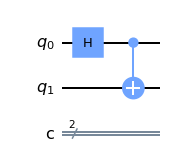

In [16]:
### Create Bell State
bell = QuantumCircuit(2, 2, name='Bell State')
bell.h(0)
bell.cx(0,1)
bell.draw(output='mpl')

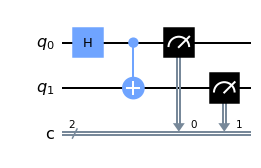

In [17]:
### Add measurement
bell.measure([0,1],[0,1])
bell.draw(output='mpl')

In [29]:
### Connect to quantum computer simulator and measure
backend = Aer.get_backend("qasm_simulator")
result = execute(bell, backend=backend, shots = 64).result()

{'00': 29, '11': 35}


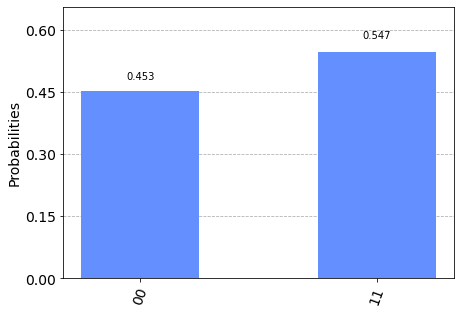

In [30]:
### Visualize results
counts = result.get_counts(bell)
print(counts)
plot_histogram(counts)

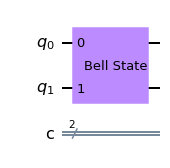

In [15]:
### Example of adding Bell State onto a control circuit
control = QuantumCircuit(2,2)
control.append(bell, [0,1])
control.draw(output='mpl')

## Execute on a real Quantum Computer

In [26]:
### Fetch IBM token
# IBMQ.save_account('44a66dd506ef42e540395efa67c2b160558f6425abe98aa5900a5747979902e98add88d240bdd52284ef049ad26aeaefe5dfd167760bf50d6b3777f08e3515c2', overwrite=True)
IBMQ.load_account()

/home/kyledmiller/miniconda3/envs/qis/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [46]:
### View available backends
provider = IBMQ.get_provider(group='open')
provider.backends(filters=lambda x: x.configuration().n_qubits == 5 and not x.configuration().simulator)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [31]:
### Execute on ibmqx2
backend = provider.get_backend("ibmqx2")
job = execute(bell, backend=backend)

In [33]:
### Monitor job (realtime)
job_monitor(job)

Job Status: job has successfully run


In [39]:
### Retrieve finished job
old_jobs = backend.jobs(limit=3)
# old_job = backend.retrieve_job("6030534f75d6a263d5690e9a") #or use id from IBMQ website/dashboard

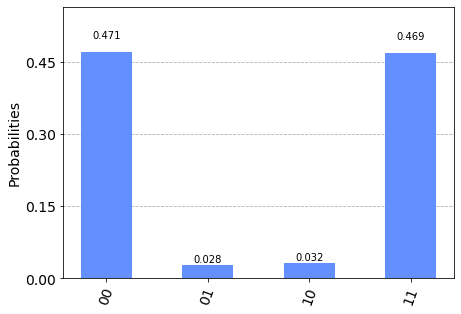

In [41]:
plot_histogram(old_job[0].result().get_counts())

## Sorting Backends